In [587]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [588]:
df2 = pd.read_csv("../../Data/03.통합.csv")
sido_df = df2.iloc[:, :2]
sido_df

,년도,시도
0,2013,경기도
1,2013,서울특별시
2,2013,경상남도
3,2013,부산광역시
4,2013,대구광역시
...,...,...
131,2020,충청북도
132,2020,대전광역시
133,2020,강원도
134,2020,제주특별자치도


In [589]:
df = pd.read_csv("../../Data/companies/통합_k.csv")
df = df.iloc[:, :5]
df

,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생
0,1821303,112129,286,739619,49143
1,1620640,84066,395,469392,48097
2,423864,29504,65,190166,12612
3,496161,25831,82,160821,13902
4,363224,19340,86,136309,9981
...,...,...,...,...,...
131,226441,8607,40,85135,6103
132,243418,7481,44,79807,6405
133,217897,7835,32,73478,5554
134,94736,3989,23,40575,2856


In [590]:
from sklearn.cluster import KMeans

df_temp = df.copy()
# df_temp.set_index('시도', inplace=True)
df_km = df_temp

data_points = df_km.values
km = KMeans(n_clusters=4).fit(data_points) # n_clusters 에 값을 정해주기!
df_km['cluster_id'] = km.labels_

df_km['cluster_id'] = df_km['cluster_id'] + 10
df_km_temp = df_km.sort_values(by='전출인구', ascending=True)
temp_list = df_km_temp['cluster_id'].unique()

# 클러스터 0~1로 변경
i = 3
for temp in temp_list:
    df_km['cluster_id'][df_km['cluster_id'] == temp] = i
    i-=1
df_km['cluster_id'] = np.round(df_km['cluster_id'] / 3, 2)
df_km['cluster_id'].unique()

# Feature, Target
data = df_km[['전출인구', '출생아수', '산부인과의원수', '초등학생인원수', '도매 및 소매업 신생']].to_numpy()
target = df_km['cluster_id'].to_numpy()

# 데이터셋 나누기 
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = \
    train_test_split(data, target, test_size=0.2) # random_state=42,  stratify=target
    
# 회귀 예측
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_input, train_target)
print("Train score:", lr.score(test_input, test_target))

Train score: 0.8302297934588351


In [591]:
df

,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생
0,1821303,112129,286,739619,49143
1,1620640,84066,395,469392,48097
2,423864,29504,65,190166,12612
3,496161,25831,82,160821,13902
4,363224,19340,86,136309,9981
...,...,...,...,...,...
131,226441,8607,40,85135,6103
132,243418,7481,44,79807,6405
133,217897,7835,32,73478,5554
134,94736,3989,23,40575,2856


In [592]:
pred_cluster = []

for i in range(len(df_km)):
    pred_cluster.append(lr.predict([[df.iloc[i,0], df.iloc[i,1], df.iloc[i,2], df.iloc[i,3], df.iloc[i,4]]]))

df_km['pred_cluster'] = pred_cluster
df_km = pd.concat([sido_df, df_km], axis=1)
df_km

,년도,시도,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,cluster_id,pred_cluster
0,2013,경기도,1821303,112129,286,739619,49143,0.00,[-0.008892500365635048]
1,2013,서울특별시,1620640,84066,395,469392,48097,0.33,[0.24428808514549327]
2,2013,경상남도,423864,29504,65,190166,12612,0.67,[0.7635643111489014]
3,2013,부산광역시,496161,25831,82,160821,13902,0.67,[0.7718454441295943]
4,2013,대구광역시,363224,19340,86,136309,9981,0.67,[0.8519458832101348]
...,...,...,...,...,...,...,...,...,...
131,2020,충청북도,226441,8607,40,85135,6103,1.00,[0.9164513845246397]
132,2020,대전광역시,243418,7481,44,79807,6405,1.00,[0.9177146247791552]
133,2020,강원도,217897,7835,32,73478,5554,1.00,[0.9263229454881213]
134,2020,제주특별자치도,94736,3989,23,40575,2856,1.00,[0.9831159756234134]


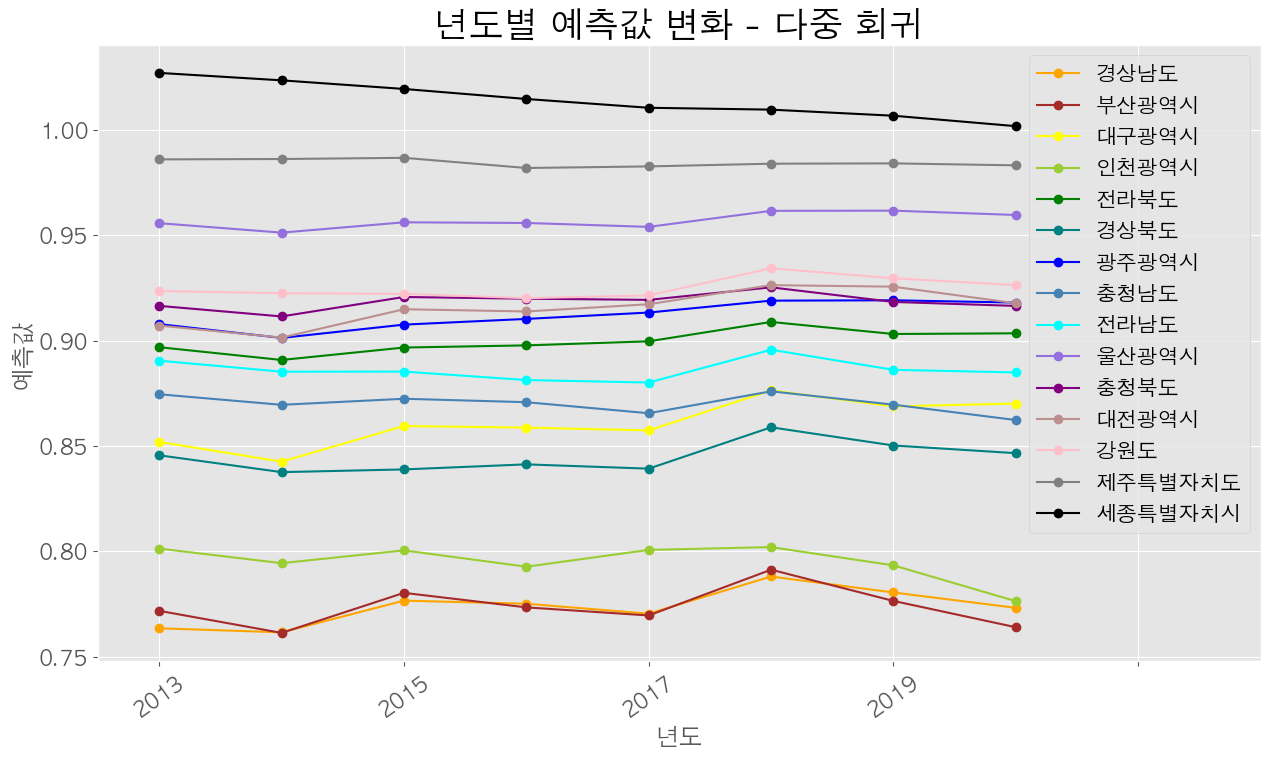

In [593]:
plt.style.use('ggplot')

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1) #하나짜리 그래프

sido = pd.unique(df_km.시도)
years = list(range(8))
colors = ['red', 'salmon', 'orange', 'brown', 'yellow', 'yellowgreen', 'green', 'teal', 'blue', 'steelblue', 'cyan', 'mediumpurple', 'purple', 'rosybrown', 'pink', 'gray','black']

for i in [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]:
    
    ax.plot(
        years,
        df_km[df_km['시도'] == sido[i]]['pred_cluster'],
        marker='o',
        label=sido[i],
        color=colors[i]
    )

ax.legend(loc='best', fontsize=15)
ax.set_xlim(-0.5, 9)
# ax.set_ylim(0.75, 1.05)
plt.yticks(fontsize=15)
ax.set_title('년도별 예측값 변화 - 다중 회귀', size=25)
ax.set_ylabel('예측값', fontsize=17)
ax.set_xlabel('년도', fontsize=17)
ax.set_xticklabels([0, 2013, 2015, 2017, 2019], rotation=35, fontsize=15)
# ax.set_yticklabels([0.75, 0.80, 0.85, 0.9, 0.95, 1.00, 1.05], fontsize=15)

plt.show()

In [594]:
bu = df_km[(df_km['시도'] == '부산광역시') & (df_km['년도'] > 2015)]
bu = bu.astype({'년도':float, 'pred_cluster':float})
bu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 54 to 122
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   년도            5 non-null      float64
 1   시도            5 non-null      object 
 2   전출인구          5 non-null      int64  
 3   출생아수          5 non-null      int64  
 4   산부인과의원수       5 non-null      int64  
 5   초등학생인원수       5 non-null      int64  
 6   도매 및 소매업 신생   5 non-null      int64  
 7   cluster_id    5 non-null      float64
 8   pred_cluster  5 non-null      float64
dtypes: float64(3), int64(5), object(1)
memory usage: 400.0+ bytes


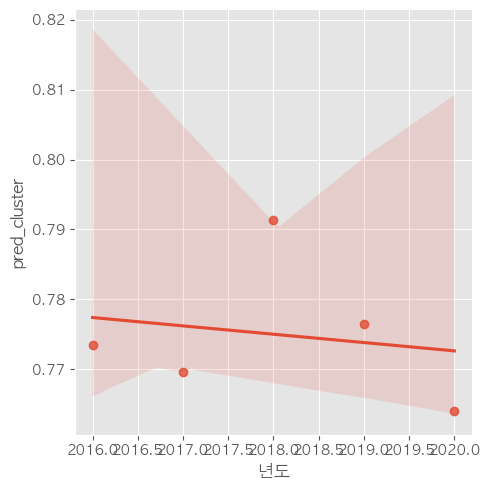

In [595]:
sns.lmplot(x='년도', y='pred_cluster', data=bu)

In [596]:
# 회귀선 그래프 뽑는 함수
def makeG(a): 
    bb = df_km[(df_km['시도'] == a) & (df_km['년도'] > 2015)]
    bb = bb.astype({'년도':float, 'pred_cluster':float})
    sns.lmplot(x='년도', y='pred_cluster', data=bb)

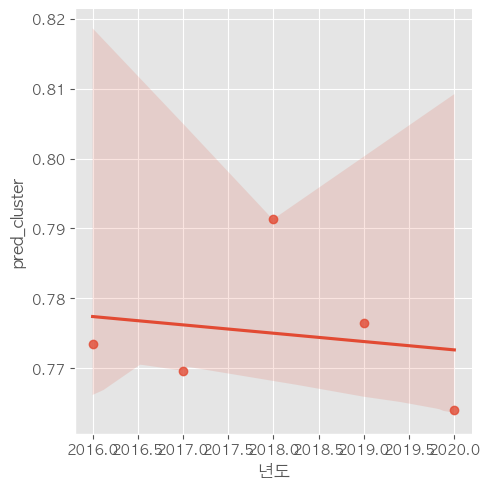

In [597]:
makeG('부산광역시')

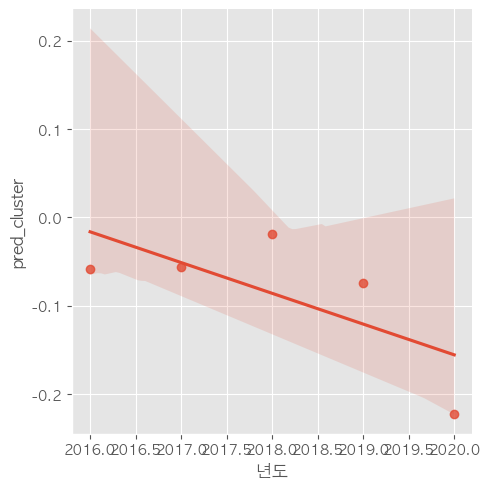

In [598]:
makeG('경기도')

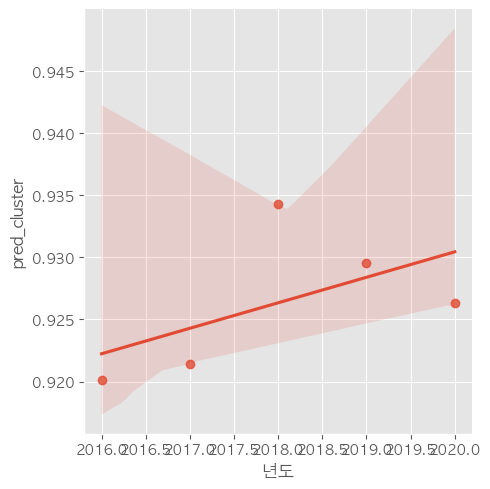

In [599]:
makeG('강원도')

In [600]:
bu

,년도,시도,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,cluster_id,pred_cluster
54,2016.0,부산광역시,480407,24906,70,151207,13686,0.67,0.773478
71,2017.0,부산광역시,467471,21480,65,150863,13900,0.67,0.769643
88,2018.0,부산광역시,442854,19152,65,152775,12472,0.67,0.791346
105,2019.0,부산광역시,435058,17049,67,155589,13569,0.67,0.776540
122,2020.0,부산광역시,506176,15058,67,153527,14454,0.67,0.764067


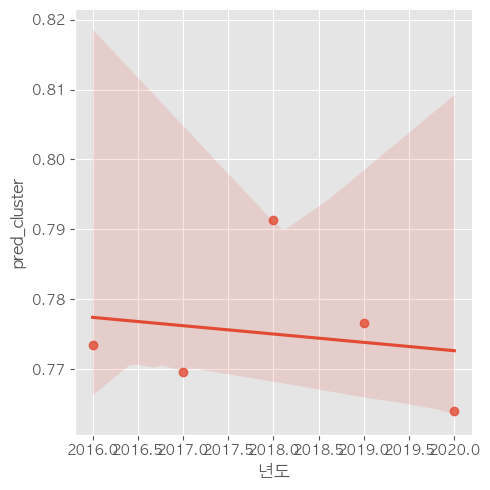

In [601]:
makeG('부산광역시')

In [602]:
# Feature, Target
data = bu[['년도']].to_numpy()
target = bu['pred_cluster'].to_numpy()

# 회귀 예측
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(data, target)
print(lr.coef_, lr.intercept_)

[-0.00119262] 3.1817211668107745


## 강원도 미래 예측 그리는 파일 만들어보기..

In [603]:
# 강원도 데이터만 고르기
gang = df_km[df_km['시도'] == '강원도']

# Feature, Target
data = gang[['년도']].to_numpy()
target = gang['pred_cluster'].to_numpy()

# 회귀 예측 -> 기울기, 절편
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(data, target)
print(lr.coef_, lr.intercept_)

[0.00110489] -1.303024326236553


- 2013년은 (0, -2.66)
- 2050년을 입력했을 때 (37, -2.59)

In [604]:
(2050 - 2013) * lr.coef_ + lr.intercept_

array([-1.26214351])

In [605]:
# 모델 저장하기
import joblib
filename = "../../Data/companies/test_강원도_lr.h5"
joblib.dump(lr, filename)

['../../Data/companies/test_강원도_lr.h5']